In [158]:
import pandas as pd
train=pd.read_csv("Auction_master_train.csv")
test=pd.read_csv("Auction_master_test.csv")
submit=pd.read_csv("Auction_submission.csv")
result=pd.read_csv("Auction_result.csv")
regist=pd.read_csv("Auction_regist.csv")
rent=pd.read_csv("Auction_rent.csv")

In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Auction_key                  1933 non-null   int64  
 1   Auction_class                1933 non-null   object 
 2   Bid_class                    1933 non-null   object 
 3   Claim_price                  1933 non-null   int64  
 4   Appraisal_company            1933 non-null   object 
 5   Appraisal_date               1933 non-null   object 
 6   Auction_count                1933 non-null   int64  
 7   Auction_miscarriage_count    1933 non-null   int64  
 8   Total_land_gross_area        1933 non-null   float64
 9   Total_land_real_area         1933 non-null   float64
 10  Total_land_auction_area      1933 non-null   float64
 11  Total_building_area          1933 non-null   float64
 12  Total_building_auction_area  1933 non-null   float64
 13  Total_appraisal_pr

In [160]:
train

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,강제,일반,280000000,삼창감정,2017-02-16 00:00:00,1,0,66419.3,40.55,40.55,84.87,84.87,401000000,401000000,2017-06-19 00:00:00,2017-06-19 00:00:00,낙찰,Private,서울,도봉구,창동,NaN,N,45.0,NaN,삼성 110동 15층 1501호,아파트,1992-08-29 00:00:00,21,15,NaN,N,노해로66길,21.0,NaN,2017-08-30 00:00:00,배당,37.648810,127.048683,402500000
1929,1295,임의,일반,200000000,삼상감정,2015-02-21 00:00:00,2,1,20433.8,39.60,39.60,114.81,114.81,454000000,363200000,2017-02-13 00:00:00,2017-03-13 00:00:00,낙찰,중소기업은행,서울,노원구,상계동,NaN,N,1289.0,NaN,상계불암대림 205동 23층 2303호,아파트,2000-05-30 00:00:00,23,23,NaN,N,덕릉로94길,21.0,NaN,2017-05-24 00:00:00,배당,37.663291,127.077063,430234600
1930,254,임의,일반,354805459,서초감정,2016-10-21 00:00:00,2,1,7460.8,19.03,19.03,133.98,133.98,1285000000,1028000000,2017-12-21 00:00:00,2018-01-18 00:00:00,낙찰,우리은행,서울,중구,회현동1가,NaN,N,208.0,NaN,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",주상복합,2011-12-13 00:00:00,32,19,NaN,N,소공로,35.0,NaN,2018-03-29 00:00:00,배당,37.558319,126.981994,1118999990
1931,1486,강제,일반,80000000,한미감정,2016-06-17 00:00:00,2,1,16875.8,42.20,42.20,84.94,84.94,407000000,325600000,2016-10-10 00:00:00,2016-11-14 00:00:00,낙찰,Private,서울,도봉구,쌍문동,NaN,N,725.0,NaN,삼성래미안 110동 11층 1102호,아파트,2002-11-07 00:00:00,15,11,NaN,N,우이천로,328.0,NaN,2017-01-24 00:00:00,배당,37.647061,127.028002,403000000


In [161]:
import numpy as np
# print(np.unique(train['Auction_class']))
# print(np.unique(train['Bid_class']))
# print(np.unique(train['Final_result']))
# print(np.unique(train['addr_do']))
# print(np.unique(train['addr_si']))
# print(np.unique(train['addr_dong']))
# print(np.unique(train['addr_li']))
# print(np.unique(train['addr_san']))
# print(np.unique(train['addr_bunji2']))
# print(np.unique(train['Apartment_usage']))
# print(np.unique(train['road_name']))
# print(np.unique(train['Close_result']))

#data pre-processing

##drop

In [162]:
train=train.drop(axis=1,columns=['Appraisal_company','Final_result','Creditor','addr_etc','road_name','addr_bunji2','Specific','addr_si','addr_dong','road_bunji1','road_bunji2','addr_li','Close_date'])
train.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,addr_do,addr_san,addr_bunji1,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,부산,N,1398.0,주상복합,2009-07-14 00:00:00,45,5,N,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,부산,N,1407.0,아파트,2011-12-16 00:00:00,70,51,N,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,부산,N,552.0,아파트,1992-07-31 00:00:00,15,14,N,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,부산,N,243.0,아파트,2001-07-13 00:00:00,20,11,N,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,부산,N,399.0,아파트,2001-11-27 00:00:00,7,7,N,배당,35.099630,128.998874,158660000


In [163]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['addr_san']=le.fit_transform(train['addr_san'])
train['Auction_class']=le.fit_transform(train['Auction_class'])
train['Bid_class']=le.fit_transform(train['Bid_class'])
train['Apartment_usage']=le.fit_transform(train['Apartment_usage'])
train['Close_result']=le.fit_transform(train['Close_result'])
train['addr_do']=le.fit_transform(train['addr_do'])
train['Share_auction_YorN']=le.fit_transform(train['Share_auction_YorN'])
train.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,addr_do,addr_san,addr_bunji1,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,Close_result,point.y,point.x,Hammer_price
0,2687,1,0,1766037301,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,0,0,1398.0,1,2009-07-14 00:00:00,45,5,0,1,35.162717,129.137048,760000000
1,2577,1,2,152946867,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,0,0,1407.0,0,2011-12-16 00:00:00,70,51,0,1,35.156633,129.145068,971889999
2,2197,1,0,11326510,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,0,0,552.0,0,1992-07-31 00:00:00,15,14,0,1,35.184601,128.996765,93399999
3,2642,1,2,183581724,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,0,0,243.0,0,2001-07-13 00:00:00,20,11,0,1,35.154180,129.089081,256899000
4,1958,0,2,45887671,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,0,0,399.0,0,2001-11-27 00:00:00,7,7,0,1,35.099630,128.998874,158660000


##One hot encoding

In [164]:
print(np.unique(train['Auction_class']))
print(np.unique(train['Bid_class']))
print(np.unique(train['addr_san']))
print(np.unique(train['Apartment_usage']))
print(np.unique(train['Close_result']))
print(np.unique(train['addr_do']))
print(np.unique(train['Share_auction_YorN']))

[0 1]
[0 1 2]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [165]:
#Bid class 만 one hot encoding
train=pd.get_dummies(train,columns=['Bid_class'])

In [166]:
train=train.fillna(0)

In [167]:
train.head()

,Auction_key,Auction_class,Claim_price,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,addr_do,addr_san,addr_bunji1,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,Close_result,point.y,point.x,Hammer_price,Bid_class_0,Bid_class_1,Bid_class_2
0,2687,1,1766037301,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,0,0,1398.0,1,2009-07-14 00:00:00,45,5,0,1,35.162717,129.137048,760000000,1,0,0
1,2577,1,152946867,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,0,0,1407.0,0,2011-12-16 00:00:00,70,51,0,1,35.156633,129.145068,971889999,0,0,1
2,2197,1,11326510,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,0,0,552.0,0,1992-07-31 00:00:00,15,14,0,1,35.184601,128.996765,93399999,1,0,0
3,2642,1,183581724,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,0,0,243.0,0,2001-07-13 00:00:00,20,11,0,1,35.154180,129.089081,256899000,0,0,1
4,1958,0,45887671,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,0,0,399.0,0,2001-11-27 00:00:00,7,7,0,1,35.099630,128.998874,158660000,0,0,1


##Date 처리

In [168]:
from datetime import datetime
train['Appraisal_date']=pd.to_datetime(train['Appraisal_date'],format="%Y-%m-%d")
train['First_auction_date']=pd.to_datetime(train['First_auction_date'],format="%Y-%m-%d")
train['Final_auction_date']=pd.to_datetime(train['Final_auction_date'],format="%Y-%m-%d")

# train['Preserve_regist_date']=pd.to_datetime(train['Preserve_regist_date'],format="%Y-%m-%d")
#Out of bounds nanosecond timestamp: 1111-11-11 00:00:00

train=train.drop(axis=1,columns=['Preserve_regist_date'])

In [169]:
for i in range(len(train['Appraisal_date'])):
    train['Appraisal_date'][i]=train['Appraisal_date'][i].strftime("%Y%m%d")
    train['First_auction_date'][i]=train['First_auction_date'][i].strftime("%Y%m%d")
    train['Final_auction_date'][i]=train['Final_auction_date'][i].strftime("%Y%m%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [170]:
train.head(5)

,Auction_key,Auction_class,Claim_price,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,addr_do,addr_san,addr_bunji1,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,Close_result,point.y,point.x,Hammer_price,Bid_class_0,Bid_class_1,Bid_class_2
0,2687,1,1766037301,20170726,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,20180213,20180320,0,0,1398.0,1,45,5,0,1,35.162717,129.137048,760000000,1,0,0
1,2577,1,152946867,20160912,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,20161229,20170202,0,0,1407.0,0,70,51,0,1,35.156633,129.145068,971889999,0,0,1
2,2197,1,11326510,20161122,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,20170728,20171013,0,0,552.0,0,15,14,0,1,35.184601,128.996765,93399999,1,0,0
3,2642,1,183581724,20161213,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,20170720,20171102,0,0,243.0,0,20,11,0,1,35.154180,129.089081,256899000,0,0,1
4,1958,0,45887671,20160307,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,20160706,20160803,0,0,399.0,0,7,7,0,1,35.099630,128.998874,158660000,0,0,1


In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Auction_key                  1933 non-null   int64  
 1   Auction_class                1933 non-null   int64  
 2   Claim_price                  1933 non-null   int64  
 3   Appraisal_date               1933 non-null   object 
 4   Auction_count                1933 non-null   int64  
 5   Auction_miscarriage_count    1933 non-null   int64  
 6   Total_land_gross_area        1933 non-null   float64
 7   Total_land_real_area         1933 non-null   float64
 8   Total_land_auction_area      1933 non-null   float64
 9   Total_building_area          1933 non-null   float64
 10  Total_building_auction_area  1933 non-null   float64
 11  Total_appraisal_price        1933 non-null   int64  
 12  Minimum_sales_price          1933 non-null   int64  
 13  First_auction_date

##Hammer price

원본에 자연로그를 씌우면 -inf 경고메시지가 뜨지만

 

원본에 1을 더한 값에 로그를 씌우면 결국 log1인 것이니 0부터 값이 잘 나오게 된다.

 

 

 

이렇게 매번 1을 더하기는 귀찮으니

 

Numpy에서는 log1p라는 함수로 이를 한번에 해줄 수 있다.

 

In [172]:
train["Hammer_price_log1p"] = np.log1p(train["Hammer_price"])
#1을 더해서 log를 씌워줘서 다시 빼야한다
train["Hammer_price_log1p"]=train["Hammer_price_log1p"]-1
train.head()

,Auction_key,Auction_class,Claim_price,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,addr_do,addr_san,addr_bunji1,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,Close_result,point.y,point.x,Hammer_price,Bid_class_0,Bid_class_1,Bid_class_2,Hammer_price_log1p
0,2687,1,1766037301,20170726,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,20180213,20180320,0,0,1398.0,1,45,5,0,1,35.162717,129.137048,760000000,1,0,0,19.448829
1,2577,1,152946867,20160912,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,20161229,20170202,0,0,1407.0,0,70,51,0,1,35.156633,129.145068,971889999,0,0,1,19.694753
2,2197,1,11326510,20161122,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,20170728,20171013,0,0,552.0,0,15,14,0,1,35.184601,128.996765,93399999,1,0,0,17.352402
3,2642,1,183581724,20161213,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,20170720,20171102,0,0,243.0,0,20,11,0,1,35.154180,129.089081,256899000,0,0,1,18.364194
4,1958,0,45887671,20160307,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,20160706,20160803,0,0,399.0,0,7,7,0,1,35.099630,128.998874,158660000,0,0,1,17.882274


왜도 (Skewness)
- 분포의 비대칭도.

- 정규분포 = 왜도 0

- 왼쪽으로 치우침 = 왜도 > 0

- 오른쪽으로 치우침 = 왜도 < 0

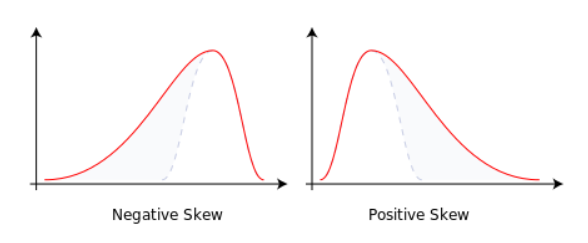

첨도 (Kurtosis)
- 확률분포의 뾰족한 정도.

- 정규분포 = 첨도 0(Pearson 첨도 = 3)

- 위로 뾰족함 = 첨도 > 0(Pearson 첨도 >3)

- 아래로 뾰족함 = 첨도 < 0 (Pearson 첨도 < 3)

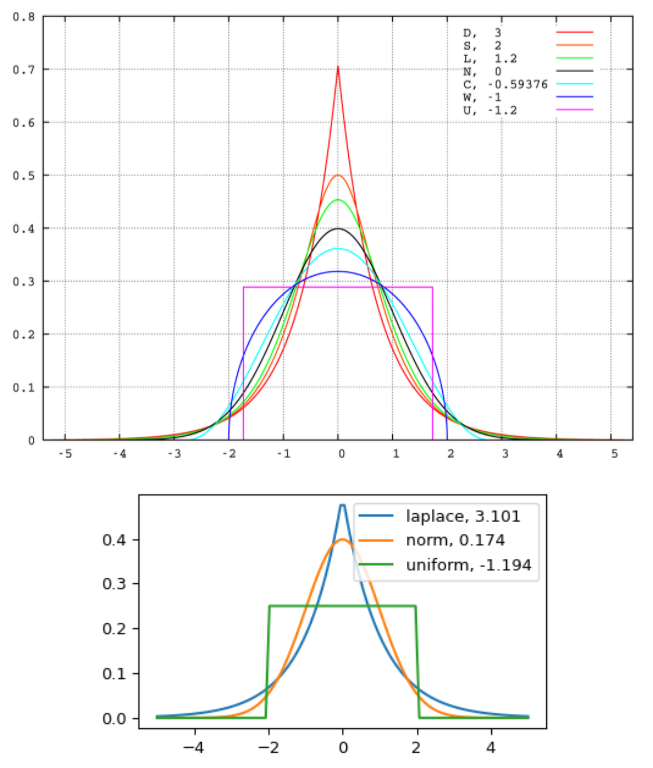

Skewness: 11.179
Kurtosis: 255.170


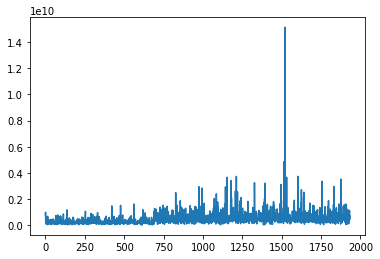

In [173]:
import matplotlib.pyplot as plt
plt.plot(train["Hammer_price"]) 
print("Skewness: {:.3f}".format(train["Hammer_price"].skew())) 
print("Kurtosis: {:.3f}".format(train["Hammer_price"].kurt()))


Skewness: -0.290
Kurtosis: 1.171


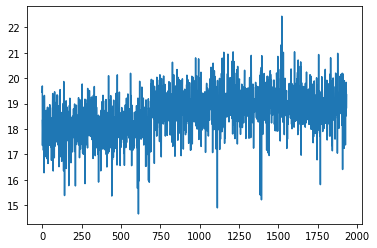

In [174]:
plt.plot(train["Hammer_price_log1p"]) 
print("Skewness: {:.3f}".format(train["Hammer_price_log1p"].skew())) 
print("Kurtosis: {:.3f}".format(train["Hammer_price_log1p"].kurt()))

In [175]:
y_train=train['Hammer_price_log1p']
x_train=train.drop(axis=1,columns=['Hammer_price','Hammer_price_log1p'])
y_train.head(5)

0    19.448829
1    19.694753
2    17.352402
3    18.364194
4    17.882274
Name: Hammer_price_log1p, dtype: float64

##x,y 나누기

In [176]:
x_train.head(5)

,Auction_key,Auction_class,Claim_price,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,addr_do,addr_san,addr_bunji1,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,Close_result,point.y,point.x,Bid_class_0,Bid_class_1,Bid_class_2
0,2687,1,1766037301,20170726,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,20180213,20180320,0,0,1398.0,1,45,5,0,1,35.162717,129.137048,1,0,0
1,2577,1,152946867,20160912,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,20161229,20170202,0,0,1407.0,0,70,51,0,1,35.156633,129.145068,0,0,1
2,2197,1,11326510,20161122,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,20170728,20171013,0,0,552.0,0,15,14,0,1,35.184601,128.996765,1,0,0
3,2642,1,183581724,20161213,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,20170720,20171102,0,0,243.0,0,20,11,0,1,35.154180,129.089081,0,0,1
4,1958,0,45887671,20160307,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,20160706,20160803,0,0,399.0,0,7,7,0,1,35.099630,128.998874,0,0,1


##test set 에도 똑같이 적용

In [177]:
test=test.drop(axis=1,columns=['Appraisal_company','Final_result','Creditor','addr_etc','road_name','addr_bunji2','Specific','addr_si','addr_dong','road_bunji1','road_bunji2','addr_li','Close_date'])

test['addr_san']=le.fit_transform(test['addr_san'])
test['Auction_class']=le.fit_transform(test['Auction_class'])
test['Bid_class']=le.fit_transform(test['Bid_class'])
test['Apartment_usage']=le.fit_transform(test['Apartment_usage'])
test['Close_result']=le.fit_transform(test['Close_result'])
test['addr_do']=le.fit_transform(test['addr_do'])
test['Share_auction_YorN']=le.fit_transform(test['Share_auction_YorN'])

test=pd.get_dummies(test,columns=['Bid_class'])

test=test.fillna(0)

test['Appraisal_date']=pd.to_datetime(test['Appraisal_date'],format="%Y-%m-%d")
test['First_auction_date']=pd.to_datetime(test['First_auction_date'],format="%Y-%m-%d")
test['Final_auction_date']=pd.to_datetime(test['Final_auction_date'],format="%Y-%m-%d")

test=test.drop(axis=1,columns=['Preserve_regist_date','Hammer_price'])

for i in range(len(test['Appraisal_date'])):
    test['Appraisal_date'][i]=test['Appraisal_date'][i].strftime("%Y%m%d")
    test['First_auction_date'][i]=test['First_auction_date'][i].strftime("%Y%m%d")
    test['Final_auction_date'][i]=test['Final_auction_date'][i].strftime("%Y%m%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [178]:
test.head()

,Auction_key,Auction_class,Claim_price,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,addr_do,addr_san,addr_bunji1,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,Close_result,point.y,point.x,Bid_class_0,Bid_class_1,Bid_class_2
0,1778,0,1087000000,20120611,7,6,532.0,18.22,18.22,107.28,107.28,244565981,100174000,20130704,20160527,0,0,236.0,1,15,5,0,1,35.201112,129.088687,1,0,0
1,1779,0,1087000000,20120611,6,5,532.0,16.65,16.65,98.08,98.08,228745632,117118000,20130704,20160429,0,0,236.0,1,15,6,0,1,35.201112,129.088687,1,0,0
2,1784,0,1087000000,20120611,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,20130704,20160527,0,0,236.0,1,15,8,0,1,35.201112,129.088687,1,0,0
3,1786,0,1087000000,20120611,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,20130704,20160527,0,0,236.0,1,15,9,0,1,35.201112,129.088687,1,0,0
4,1790,0,1087000000,20120611,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,20130704,20160527,0,0,236.0,1,15,11,0,1,35.201112,129.088687,1,0,0


#data modeling

In [183]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(test))
print(np.shape(submit))

(1933, 28)
(1933,)
(829, 28)
(829, 2)


In [179]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
test_predict_y=lg.predict(test)

In [186]:
test_predict_y=np.exp(test_predict_y)
submit['Hammer_price']=test_predict_y
submit.head()

,Auction_key,Hammer_price
0,1778,6.217003e+07
1,1779,6.158949e+07
2,1784,6.209038e+07
3,1786,6.213585e+07
4,1790,6.222688e+07


In [187]:
submit.to_csv("submission.csv",mode='w')